# Homework 1: Applied Machine Learning - Linear | Logisitc | SVM

### Name: Chandan Suri, UNI: CS4090, Email: cs4090@columbia.edu

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
pd.options.mode.chained_assignment = None

#**Part 1: Linear Regression**

In part 1, we will use **two datasets** to train and evaluate our linear regression model.

The first dataset will be a synthetic dataset sampled from the following equations:
   
**𝜖 ∼ Normal(0,3**)

**z = 3𝑥 + 10y + 10 + 𝜖**

In [4]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)
x = np.linspace(0, 10, 100) 
y = np.linspace(0, 5, 100)
z = 3 * x + 10 * y + 10 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

- Linearity: $y$ is a linear (technically affine) function of $x$.
- Independence: the $x$'s are independently drawn, and not dependent on each other.
- Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
- Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**1.1. Plot z vs x and z vs y in the synthetic dataset as scatter plots. Label your axes and make sure your y-axis starts from 0. Do the independent and dependent features have linear relationship?**

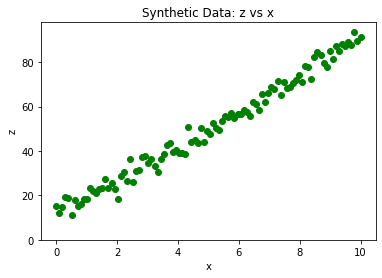

In [5]:
plt.scatter(x, z, c = "green")
plt.ylim(ymin = 0)
plt.xlabel("x")
plt.ylabel("z")
plt.title("Synthetic Data: z vs x")
plt.show()

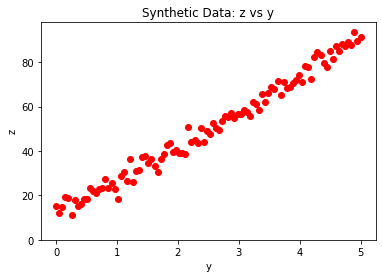

In [6]:
plt.scatter(y, z, c = "red")
plt.ylim(ymin = 0)
plt.xlabel("y")
plt.ylabel("z")
plt.title("Synthetic Data: z vs y")
plt.show()

Yes, the independent and dependent features have a linear relationship above.

**1.2. Are the independent variables correlated? Use pearson correlation to verify? What would be the problem if linear regression is applied to correlated features?**

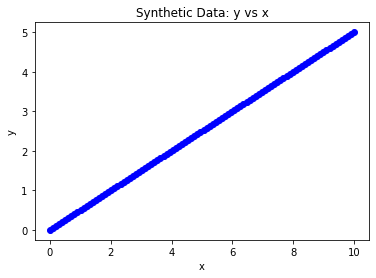

In [7]:
plt.scatter(x, y, c = "blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Data: y vs x")
plt.show()

Looking at the scatter plot above, it looks like that the independent variables are correlated. Let's do this with pearson correlation now.

In [8]:
# verification using pearson correlation which is the covariance between the variables 
# divided by the multiplication of the standard deviations of both the variables.
covariances = np.cov(x, y)
covariance_x_y = covariances[0, 1]
pearson_correlation_coeff = covariance_x_y / (np.std(x) * np.std(y))
print(f"Pearson Correlation Coefficient = {pearson_correlation_coeff}")

Pearson Correlation Coefficient = 1.01010101010101


As the pearson correlation coefficient is approximately 1 which states that they are highly positively correlated. Thus, the independent variables in the dataset are highly correlated!

The problem that arises when linear regression is applied to correlated features is the problem of "Multicollinearity". When independent variables are highly correlated, change in one variable would cause change to another and so, the model would fluctuate significantly. This would result in a highly unstable model with unstable parameters and could vary a lot for some small change in the data or the model.

**The second dataset we will be using is an auto MPG dataset. This dataset contains various characteristics for around 8128 cars. We will use linear regression to predict the selling_price label**

In [9]:
auto_mpg_df = pd.read_csv('Car details v3.csv')
# Dropping Torque column, there is information in this column but it will take some preprocessing.
# The idea of the exercise is to familarize yourself with the basics of Linear regression.
auto_mpg_df = auto_mpg_df.drop(['torque'], axis = 1)

In [10]:
auto_mpg_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


**1.3. Missing Value analysis - Auto mpg dataset.**

**Are there any missing values in the dataset? If so, what can be done about it? Jusify your approach.**

In [11]:
columns_with_units = ["mileage", "engine", "max_power"]

numerical_data = auto_mpg_df.select_dtypes(include=[np.number])
categorical_data = auto_mpg_df.select_dtypes(exclude=[np.number])
categorical_data = categorical_data.drop(columns_with_units, axis = 1)
numerical_data_with_units = auto_mpg_df[columns_with_units]

# Removing units from the numerical data that has units
for column in columns_with_units:
    numerical_data_with_units[column] = numerical_data_with_units[column].map(lambda data: str(data).split(' ')[0] \
                                                                              if data is not(np.nan) else np.nan)
    
numerical_data_with_units = numerical_data_with_units.replace(r'^\s*$', np.nan, regex=True)

In [12]:
print("Numerical Data is as follows:")
numerical_data

Numerical Data is as follows:


,year,selling_price,km_driven,seats
0,2014,450000,145500,5.0
1,2014,370000,120000,5.0
2,2006,158000,140000,5.0
3,2010,225000,127000,5.0
4,2007,130000,120000,5.0
...,...,...,...,...
8123,2013,320000,110000,5.0
8124,2007,135000,119000,5.0
8125,2009,382000,120000,5.0
8126,2013,290000,25000,5.0


In [13]:
print("Categorical Data is as follows:")
categorical_data

Categorical Data is as follows:


,name,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...
8123,Hyundai i20 Magna,Petrol,Individual,Manual,First Owner
8124,Hyundai Verna CRDi SX,Diesel,Individual,Manual,Fourth & Above Owner
8125,Maruti Swift Dzire ZDi,Diesel,Individual,Manual,First Owner
8126,Tata Indigo CR4,Diesel,Individual,Manual,First Owner


In [14]:
print("Numerical Data is as follows:")
numerical_data_with_units

Numerical Data is as follows:


,mileage,engine,max_power
0,23.4,1248,74
1,21.14,1498,103.52
2,17.7,1497,78
3,23.0,1396,90
4,16.1,1298,88.2
...,...,...,...
8123,18.5,1197,82.85
8124,16.8,1493,110
8125,19.3,1248,73.9
8126,23.57,1396,70


In [15]:
print("Number of Missing Values in Numerical data (without units): ")
print(numerical_data.isna().sum())

Number of Missing Values in Numerical data (without units): 
year               0
selling_price      0
km_driven          0
seats            221
dtype: int64


In [16]:
print("Number of Missing Values in Categorical data: ")
print(categorical_data.isnull().sum())

Number of Missing Values in Categorical data: 
name            0
fuel            0
seller_type     0
transmission    0
owner           0
dtype: int64


In [17]:
print("Number of Missing Values in Numerical data (with units): ")
print(numerical_data_with_units.isna().sum())

Number of Missing Values in Numerical data (with units): 
mileage      221
engine       221
max_power    216
dtype: int64


There are no missing values for the Categorical variables in the dataset. The only missing values are in the Numerical data (variables) namely "seats", "mileage", "engine", "max_power".

As we can see above, the number of missing entries for each of the following columns are:
1. seats - 221 (2.718996%)
2. mileage - 221 (2.718996%)
3. engine - 221 (2.718996%)
4. max_power - 216 (2.657480%)


In [23]:
print("Percentage of Missing Values in Numerical data (without units): ")
print((numerical_data.isna().sum() / len(auto_mpg_df)) * 100)

Percentage of Missing Values in Numerical data (without units): 
year             0.000000
selling_price    0.000000
km_driven        0.000000
seats            2.718996
dtype: float64


In [24]:
print("Percentage of Missing Values in Categorical data: ")
print((categorical_data.isnull().sum() / len(auto_mpg_df)) * 100)

Percentage of Missing Values in Categorical data: 
name            0.0
fuel            0.0
seller_type     0.0
transmission    0.0
owner           0.0
dtype: float64


In [25]:
print("Percentage of Missing Values in Numerical data (with units): ")
print((numerical_data_with_units.isna().sum() / len(auto_mpg_df)) * 100)

Percentage of Missing Values in Numerical data (with units): 
mileage      2.718996
engine       2.718996
max_power    2.657480
dtype: float64


In [26]:
partially_pre_processed_data = pd.concat([numerical_data, categorical_data, numerical_data_with_units], axis = 1)
partially_pre_processed_data

,year,selling_price,km_driven,seats,name,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,2014,450000,145500,5.0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,23.4,1248,74
1,2014,370000,120000,5.0,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52
2,2006,158000,140000,5.0,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,17.7,1497,78
3,2010,225000,127000,5.0,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,23.0,1396,90
4,2007,130000,120000,5.0,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,16.1,1298,88.2
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,5.0,Hyundai i20 Magna,Petrol,Individual,Manual,First Owner,18.5,1197,82.85
8124,2007,135000,119000,5.0,Hyundai Verna CRDi SX,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110
8125,2009,382000,120000,5.0,Maruti Swift Dzire ZDi,Diesel,Individual,Manual,First Owner,19.3,1248,73.9
8126,2013,290000,25000,5.0,Tata Indigo CR4,Diesel,Individual,Manual,First Owner,23.57,1396,70


In [27]:
print("Rows with Missing Values in Numerical data (without units): ")
is_nan_data = partially_pre_processed_data.isnull().any(axis = 1)
rows_with_nan = partially_pre_processed_data[is_nan_data]
rows_with_nan

Rows with Missing Values in Numerical data (without units): 


,year,selling_price,km_driven,seats,name,fuel,seller_type,transmission,owner,mileage,engine,max_power
13,2007,200000,80000,NaN,Maruti Swift 1.3 VXi,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN
31,2003,70000,50000,NaN,Fiat Palio 1.2 ELX,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN
78,2003,50000,70000,NaN,Tata Indica DLS,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN
87,2015,475000,78000,NaN,Maruti Swift VDI BSIV W ABS,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN
119,2010,300000,120000,NaN,Maruti Swift VDI BSIV,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7846,2000,200000,100000,NaN,Toyota Qualis Fleet A3,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN
7996,2000,140000,50000,NaN,Hyundai Santro LS zipPlus,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN
8009,2006,145000,80000,NaN,Hyundai Santro Xing XS eRLX Euro III,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN
8068,2017,580000,165000,NaN,Ford Figo Aspire Facelift,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN


As we can see the percentage of missing values is quite less in comparison to the number of total entries in the dataset. Also, the total number of rows with any missing entry is just 222. So, most probably, we can remove the rows with any entries as null or nan (missing). This wouldn't affect much as it's a small piece of our data. In case we don't want to remove that data, we can also put mean of each of those corresponding column entries but I would prefer to remove those rows that introducing noise in my dataset unnecessarily. 

**1.4. The features engine, max_power and mileage have units in the dataset. In the real world if we have such datasets, we generally remove the units from each feature. After doing so, convert the datatype of these columns to float. For example: 1248 CC engine is 1248, 23.4 kmpl is 23.4 and so on.**

**Hint: Check for distinct units in each of these features. A feature might have multiple units as well. Also, a feature could have no value but have unit. For example 'CC' without any value. Remove such rows.**

In [28]:
# At first we would see what all units are possible for the columns under consideration. 
columns_with_units = ["mileage", "engine", "max_power"]
units_dict = dict()

# Removing units from the numerical data that has units
for column in columns_with_units:
    units = set()
    for row in auto_mpg_df[column]:
        if row is not(np.nan):
            splitted_data = str(row).split(' ')
            if len(splitted_data) > 1:
                units.add(splitted_data[1])
    units_dict[column] = units
    
print(units_dict)

{'mileage': {'km/kg', 'kmpl'}, 'engine': {'CC'}, 'max_power': {'bhp'}}


As we can see above that there are 2 units present for mileage, 1 unit for engine and 1 for max_power. Thus, we would need to convert all the values in the mileage to one of the units so, as to generalize it.
I am going to take kmpl as the default unit and thus, convert all mileage values in km/kg into kmpl. 
After, that I am going to remove all the units for each of the columns with units and remove any rows with nan (missing values) values. Also, after doing so I am going to convert all the numerical features with units to float.

In [29]:
# In this step, we will  remove the units, convert km/kg to kmpl when applicable 
# and remove any unwanted (only unit) entries as well. And also, convert all the values to float.
for column in columns_with_units:
    for idx, row in enumerate(auto_mpg_df[column]):
        if row is not(np.nan):
            splitted_data = str(row).split(' ')
            if len(splitted_data) > 1:
                data = float(splitted_data[0]) if splitted_data[0] != '' else np.NaN
                unit = splitted_data[1]
                if unit == "km/kg":
                    data *= 1.4
                auto_mpg_df.loc[idx, column] = data
            else:
                auto_mpg_df.loc[idx, column] = np.NaN
auto_mpg_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493.0,110.0,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.0,5.0


In [30]:
# Remove all the rows with any missing values
columns_with_missing_values = ["seats", "mileage", "engine", "max_power"]
auto_mpg_df.dropna(subset=columns_with_missing_values, how="any", inplace=True)
auto_mpg_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493.0,110.0,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.0,5.0


In [31]:
auto_mpg_X = auto_mpg_df.drop(columns=['selling_price'])
auto_mpg_y = auto_mpg_df['selling_price']

**1.5. Plot the distribution of the label (selling_price) using a histogram. Make multiple plots with different binwidths. Make sure to label your axes while plotting.**

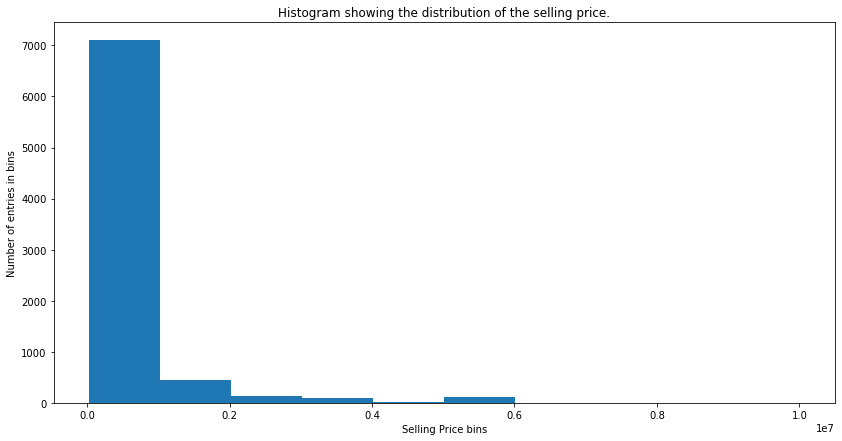

In [32]:
plt.rcParams["figure.figsize"] = (14,7)
plt.hist(auto_mpg_y, bins = 10)
plt.ylabel("Number of entries in bins")
plt.xlabel("Selling Price bins")
plt.title("Histogram showing the distribution of the selling price.")
plt.show()

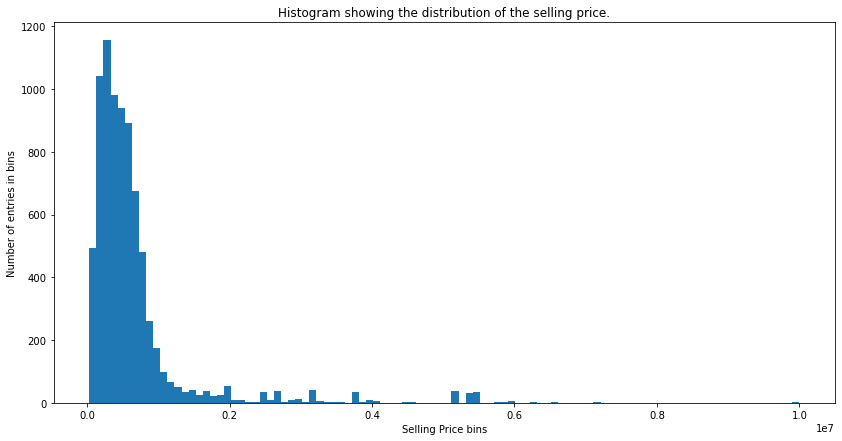

In [33]:
plt.rcParams["figure.figsize"] = (14,7)
plt.hist(auto_mpg_y, bins = 100)
plt.ylabel("Number of entries in bins")
plt.xlabel("Selling Price bins")
plt.title("Histogram showing the distribution of the selling price.")
plt.show()

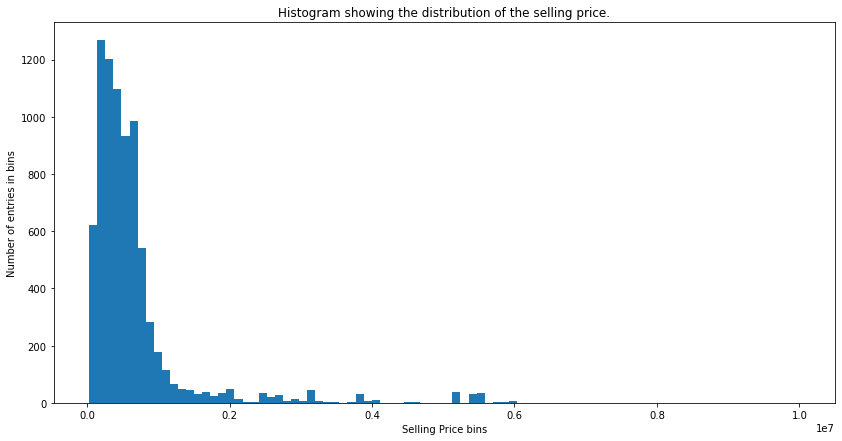

In [34]:
plt.rcParams["figure.figsize"] = (14,7)
plt.hist(auto_mpg_y, bins = int(np.sqrt(len(auto_mpg_y))))
plt.ylabel("Number of entries in bins")
plt.xlabel("Selling Price bins")
plt.title("Histogram showing the distribution of the selling price.")
plt.show()

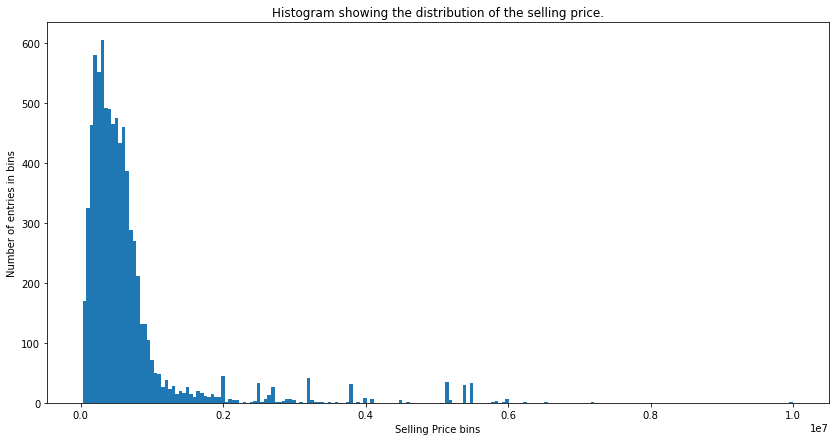

In [35]:
plt.rcParams["figure.figsize"] = (14,7)
plt.hist(auto_mpg_y, bins = 200)
plt.ylabel("Number of entries in bins")
plt.xlabel("Selling Price bins")
plt.title("Histogram showing the distribution of the selling price.")
plt.show()

**1.6. Plot the relationships between the label (Selling Price) and the continuous features (Mileage, km driven, engine, max power) using a small multiple of scatter plots. 
Make sure to label the axes. Do you see something interesting about the distributions of these features.**

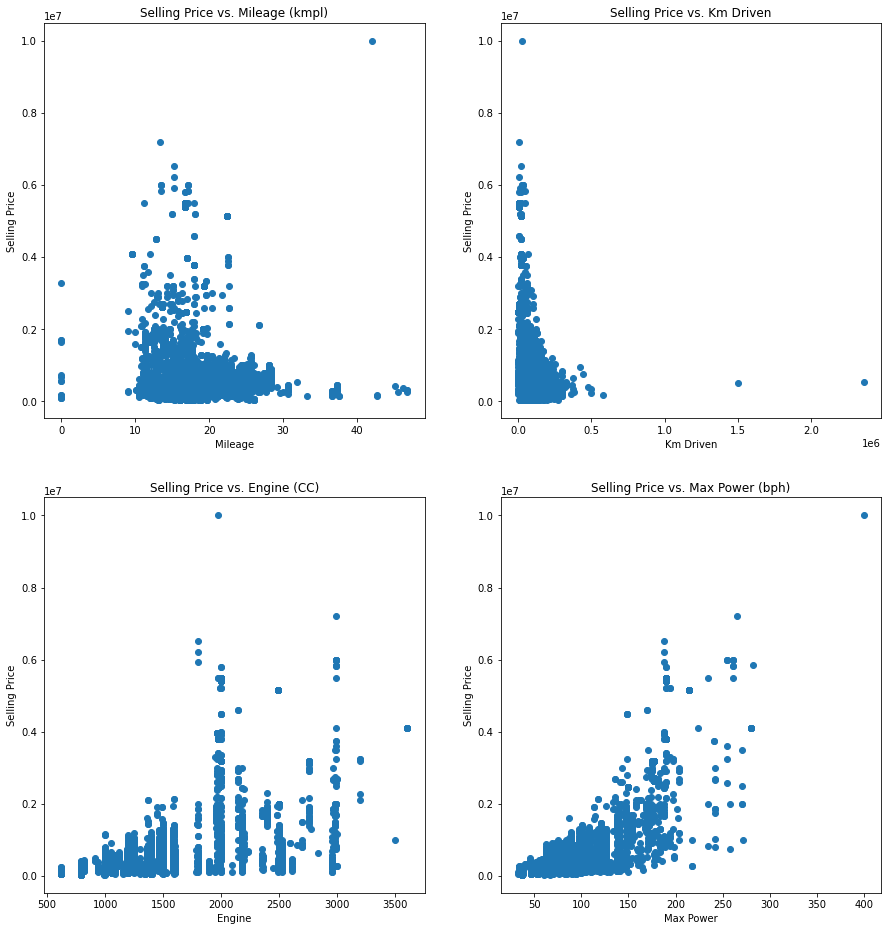

In [36]:
plt.rcParams["figure.figsize"] = (15,16)
fig, axs = plt.subplots(2, 2)

axs[0, 0].scatter(auto_mpg_X["mileage"], auto_mpg_y)
axs[0, 0].set_title('Selling Price vs. Mileage (kmpl)')
axs[0, 0].set_xlabel("Mileage")
axs[0, 0].set_ylabel("Selling Price")

axs[0, 1].scatter(auto_mpg_X["km_driven"], auto_mpg_y)
axs[0, 1].set_title('Selling Price vs. Km Driven')
axs[0, 1].set_xlabel("Km Driven")
axs[0, 1].set_ylabel("Selling Price")

axs[1, 0].scatter(auto_mpg_X["engine"], auto_mpg_y)
axs[1, 0].set_title('Selling Price vs. Engine (CC)')
axs[1, 0].set_xlabel("Engine")
axs[1, 0].set_ylabel("Selling Price")

axs[1, 1].scatter(auto_mpg_X["max_power"], auto_mpg_y)
axs[1, 1].set_title('Selling Price vs. Max Power (bph)')
axs[1, 1].set_xlabel("Max Power")
axs[1, 1].set_ylabel("Selling Price")

plt.show()

 - Mileage: It seems like it follows a skewed normal distribution w.r.t the selling price with some outliers on both the ends (tails) of the normal distribution. And there is not much correlation between the data points for selling price and mileage other than that.
 - Km Driven: Looking at the plot above, it's pretty evident that this feature forms a heavily positively skewed normal distribution with some outliers. Other than that there is no linear correlation between the data for the "Km Driven" and "Selling Price".
 - Max Power: It seems like this feature has some positive correlation (although not a strong one) w.r.t the selling price. As the trend here suggests that as the max power increases, the selling price would increase by some factor. This distribution also has some outliers.
 - Engine: It looks like this feature doesn't have a strong correlation w.r.t the selling price. Also, for most of the engine power ranges, the selling price varies a lot.

**1.7. Plot the relationships between the label (Selling Price) and the discrete features (fuel type, Seller type, transmission) using a small multiple of box plots. Make sure to label the axes.**

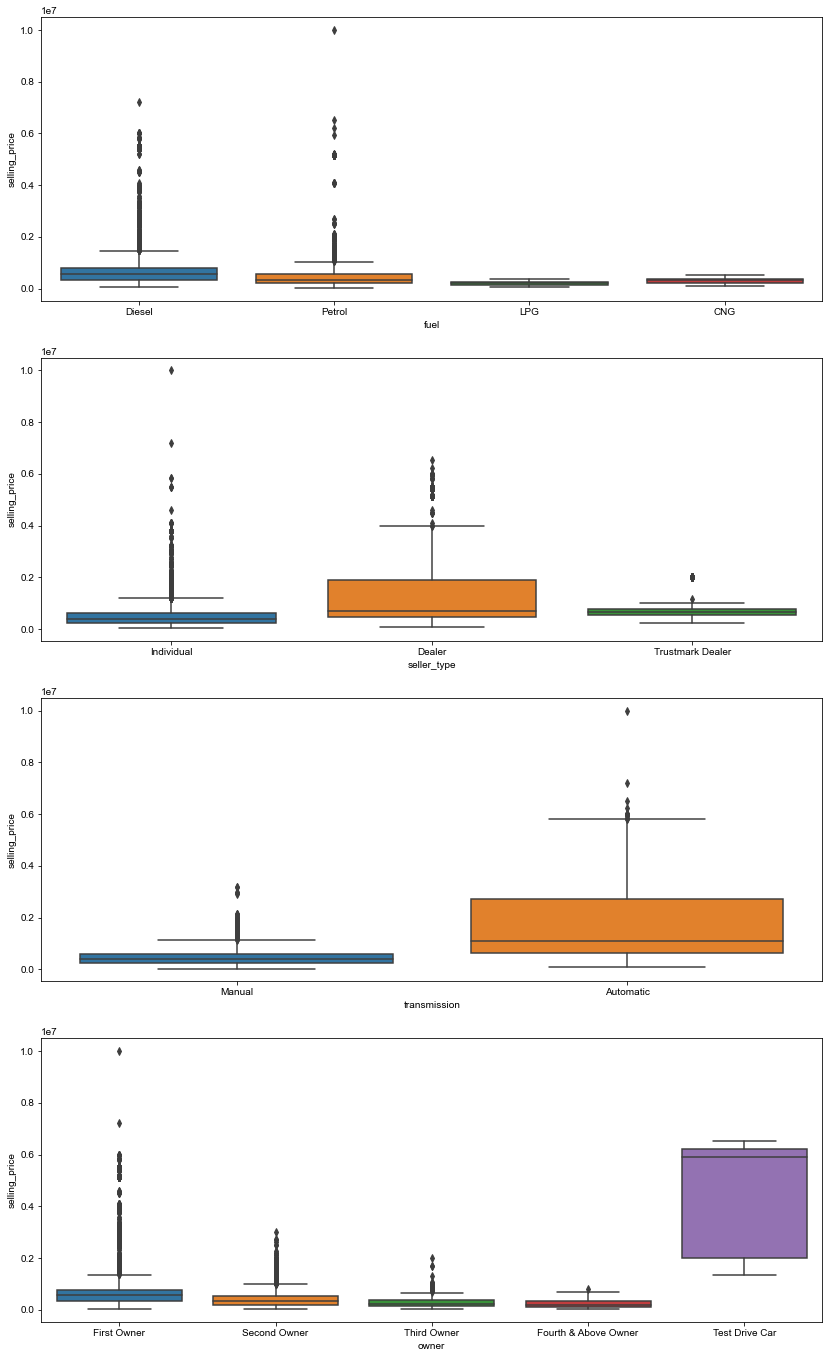

In [37]:
plt.rcParams["figure.figsize"] = (14,24)
fig, axes = plt.subplots(4, 1)
categorical_cols = ["fuel", "seller_type", "transmission", "owner"]
sns.set_style("whitegrid")

for idx, categorical_col in enumerate(categorical_cols):
    sns.boxplot(x = categorical_col, y = "selling_price", \
                data = pd.concat([auto_mpg_X, auto_mpg_y], axis = 1), \
                orient = 'v', ax = axes[idx])

**1.8. From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not?**

 No, Linear regression would not be a good model for this problem. This is because there is not a very strong linear relationship between the data and the labels (selling price). That would mean that if we need to fit a linear regression model for this, we will have to preprocess the data so, as to form a distribution such that we can apply linear regression.

In [38]:
auto_mpg_X['year'] =  2020 - auto_mpg_X['year']

In [39]:
#dropping the car name as it is irrelevant.
auto_mpg_X.drop(['name'],axis = 1,inplace=True)

#check out the dataset with new changes
auto_mpg_X.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,6,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0
1,6,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,14,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.0,5.0
3,10,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0
4,13,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.2,5.0


**Data Pre-processing**

**1.9.
Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:**
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [40]:
# For synthetic dataset:
seed = 2102

independent_vars_data_df = pd.DataFrame(data = pd.concat([pd.Series(x), pd.Series(y)], axis = 1))
# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_synth_dev, X_synth_test, y_synth_dev, y_synth_test = train_test_split(independent_vars_data_df, z, \
                                                                        test_size = 0.2, random_state = seed)
X_synth_train, X_synth_val, y_synth_train, y_synth_val = train_test_split(X_synth_dev, y_synth_dev, \
                                                                          test_size = 0.25, random_state = seed)

print(f"Training Data Size: {X_synth_train.shape}")
print(f"Validation Data Size: {X_synth_val.shape}")
print(f"Test Data Size: {X_synth_test.shape}")

# 3. Standardize the columns in the feature matrices
std_synth_scaler = StandardScaler()

# Train data
X_synth_train_scaled = pd.DataFrame(data = std_synth_scaler.fit_transform(X_synth_train))

# Validation Data
X_synth_val_scaled = pd.DataFrame(data = std_synth_scaler.transform(X_synth_val))

# Test Data
X_synth_test_scaled = pd.DataFrame(data = std_synth_scaler.transform(X_synth_test))

# 4. Add a column of ones to the feature matrices
X_synth_train_scaled["Bias"] = 1
X_synth_val_scaled["Bias"] = 1
X_synth_test_scaled["Bias"] = 1

# Convert all the dataframes to matrices and vectors
synth_X_train = X_synth_train_scaled.values
synth_X_val = X_synth_val_scaled.values
synth_X_test = X_synth_test_scaled.values

print(synth_X_train, synth_X_val, synth_X_test)
print(y_synth_train, y_synth_val, y_synth_test)

Training Data Size: (60, 2)
Validation Data Size: (20, 2)
Test Data Size: (20, 2)
[[ 6.29834946e-01  6.29834946e-01  1.00000000e+00]
 [-1.43845421e+00 -1.43845421e+00  1.00000000e+00]
 [ 8.40169437e-01  8.40169437e-01  1.00000000e+00]
 [-1.16852495e-03 -1.16852495e-03  1.00000000e+00]
 [-1.78901169e+00 -1.78901169e+00  1.00000000e+00]
 [-1.40339846e+00 -1.40339846e+00  1.00000000e+00]
 [ 1.39054469e-01  1.39054469e-01  1.00000000e+00]
 [-7.72394990e-01 -7.72394990e-01  1.00000000e+00]
 [-9.47673732e-01 -9.47673732e-01  1.00000000e+00]
 [-2.81614512e-01 -2.81614512e-01  1.00000000e+00]
 [-8.07450738e-01 -8.07450738e-01  1.00000000e+00]
 [ 3.38872235e-02  3.38872235e-02  1.00000000e+00]
 [ 1.03998720e-01  1.03998720e-01  1.00000000e+00]
 [ 4.19500456e-01  4.19500456e-01  1.00000000e+00]
 [-4.21837506e-01 -4.21837506e-01  1.00000000e+00]
 [-1.64878870e+00 -1.64878870e+00  1.00000000e+00]
 [-1.19306397e+00 -1.19306397e+00  1.00000000e+00]
 [ 3.49388959e-01  3.49388959e-01  1.00000000e+00]


In [41]:
# For MPG dataset:
categorical_cols = ["fuel", "seller_type", "transmission", "owner"]
numerical_cols = list(set(auto_mpg_X.columns) - set(categorical_cols))
seed = 2102

# 1. Encode categorial features appropriately.
auto_mpg_X = pd.get_dummies(auto_mpg_X, columns = categorical_cols)
print(f"Original DataSet Size: {auto_mpg_X.shape}")
auto_mpg_X

Original DataSet Size: (7906, 20)


,year,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,6,145500,23.4,1248.0,74.0,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,6,120000,21.14,1498.0,103.52,5.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,14,140000,17.7,1497.0,78.0,5.0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,10,127000,23.0,1396.0,90.0,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
4,13,120000,16.1,1298.0,88.2,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,7,110000,18.5,1197.0,82.85,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
8124,13,119000,16.8,1493.0,110.0,5.0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
8125,11,120000,19.3,1248.0,73.9,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
8126,7,25000,23.57,1396.0,70.0,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0


In [42]:
# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
auto_mpg_y = np.log(auto_mpg_y)
X_dev, X_test, y_dev, y_test = train_test_split(auto_mpg_X, auto_mpg_y, test_size = 0.2, random_state = seed)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.25, random_state = seed)

print(f"Training Data Size: {X_train.shape}")
print(f"Validation Data Size: {X_val.shape}")
print(f"Test Data Size: {X_test.shape}")

Training Data Size: (4743, 20)
Validation Data Size: (1581, 20)
Test Data Size: (1582, 20)


In [43]:
# 3. Standardize the columns in the feature matrices
new_categorical_cols = list(set(X_train.columns) - set(numerical_cols))
std_scaler = StandardScaler()

# Train data
X_train_scaled = std_scaler.fit_transform(X_train)

# Validation Data
X_val_scaled = std_scaler.transform(X_val)

# Test Data
X_test_scaled = std_scaler.transform(X_test)

In [44]:
# 4. Add a column of ones to the feature matrices
auto_mpg_X_train = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
auto_mpg_X_val = np.hstack([np.ones((X_val_scaled.shape[0], 1)), X_val_scaled])
auto_mpg_X_test = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])

In [45]:
# Convert all the dataframes to matrices and vectors
auto_mpg_X_train = np.matrix(auto_mpg_X_train)
auto_mpg_X_val = np.matrix(auto_mpg_X_val)
auto_mpg_X_test = np.matrix(auto_mpg_X_test)
auto_mpg_y_train = np.transpose(np.matrix(y_train.values))
auto_mpg_y_val = np.transpose(np.matrix(y_val.values))
auto_mpg_y_test = np.transpose(np.matrix(y_test.values))

In [46]:
print(auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test)

[[ 1.         -0.25865838  0.69979235 ... -0.5852223  -0.03248534
  -0.25753047]
 [ 1.         -1.04073446 -0.32746808 ... -0.5852223  -0.03248534
  -0.25753047]
 [ 1.          1.04480176  0.87100242 ... -0.5852223  -0.03248534
  -0.25753047]
 ...
 [ 1.          0.52341771  0.18616213 ...  1.70875238 -0.03248534
  -0.25753047]
 [ 1.          2.86964595  0.3573722  ... -0.5852223  -0.03248534
  -0.25753047]
 [ 1.         -1.04073446 -0.92670333 ... -0.5852223  -0.03248534
  -0.25753047]] [[ 1.         -0.5193504  -0.66988822 ...  1.70875238 -0.03248534
  -0.25753047]
 [ 1.         -1.04073446 -0.58428319 ... -0.5852223  -0.03248534
  -0.25753047]
 [ 1.          0.52341771  0.52858227 ...  1.70875238 -0.03248534
  -0.25753047]
 ...
 [ 1.         -0.78004243 -0.72125125 ...  1.70875238 -0.03248534
  -0.25753047]
 [ 1.          0.26272568  0.87100242 ...  1.70875238 -0.03248534
  -0.25753047]
 [ 1.          1.30549379  0.18616213 ... -0.5852223  -0.03248534
  -0.25753047]] [[ 1.         -0

In [47]:
feature_columns = list(auto_mpg_X.columns)
feature_columns.insert(0, "bias")
print(feature_columns)

['bias', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Automatic', 'transmission_Manual', 'owner_First Owner', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner']


**At the end of this pre-processing, you should have the following vectors and matrices:**

**- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test**

**Implement Linear Regression**

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**1.10. Implement a `LinearRegression` class with two methods: `train` and `predict`. You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [48]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        part_1 = np.add(np.dot(np.transpose(X), X), self.alpha * np.eye(X.shape[1]))
        part_2 = np.dot(np.transpose(X), y)
        self.w = np.linalg.solve(part_1, part_2)
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        y_pred = np.dot(X, self.w)
        return y_pred

**Train, Evaluate, and Interpret Linear Regression Model**

**1.11. A) Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 5 predictions on the test set, along with the actual labels.**

In [49]:
def calc_mse(y_actual, y_pred):
    return np.square(np.subtract(y_actual, y_pred)).mean()

In [50]:
model_lr_mpg = LinearRegression()
model_lr_mpg.train(auto_mpg_X_train, auto_mpg_y_train)

auto_mpg_y_train_pred = model_lr_mpg.predict(auto_mpg_X_train)
print(f"MSE for Training data: {calc_mse(auto_mpg_y_train, auto_mpg_y_train_pred)}")

auto_mpg_y_val_pred = model_lr_mpg.predict(auto_mpg_X_val)
print(f"MSE for Validation data: {calc_mse(auto_mpg_y_val, auto_mpg_y_val_pred)}")

auto_mpg_y_test_pred = model_lr_mpg.predict(auto_mpg_X_test)
print(f"MSE for Test data: {calc_mse(auto_mpg_y_test, auto_mpg_y_test_pred)}")

MSE for Training data: 0.08582221347134225
MSE for Validation data: 0.0894739098447177
MSE for Test data: 0.09347415923787637


In [51]:
print("First 5 predictions on Test data:")
print(auto_mpg_y_test_pred[:5])
print("First 5 actual labels on Test data:")
print(np.array(auto_mpg_y_test[:5]))

First 5 predictions on Test data:
[[13.26689697]
 [13.13107023]
 [13.11775945]
 [12.39515423]
 [12.84369699]]
First 5 actual labels on Test data:
[[13.52782849]
 [13.77468856]
 [13.30468493]
 [12.4490149 ]
 [13.12236338]]


**B) As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline. This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.**

In [52]:
auto_mpg_y_train_mean_vals = np.full((auto_mpg_y_train.shape), np.mean(auto_mpg_y_train))
auto_mpg_y_val_mean_vals = np.full((auto_mpg_y_val.shape), np.mean(auto_mpg_y_train))
auto_mpg_y_test_mean_vals = np.full((auto_mpg_y_test.shape), np.mean(auto_mpg_y_train))

print(f"MSE for Training data w.r.t Baseline: {calc_mse(auto_mpg_y_train, auto_mpg_y_train_mean_vals)}")
print(f"MSE for Validation data w.r.t Baseline: {calc_mse(auto_mpg_y_val, auto_mpg_y_val_mean_vals)}")
print(f"MSE for Test data w.r.t Baseline: {calc_mse(auto_mpg_y_test, auto_mpg_y_test_mean_vals)}")

MSE for Training data w.r.t Baseline: 0.670713963055895
MSE for Validation data w.r.t Baseline: 0.7005930201266619
MSE for Test data w.r.t Baseline: 0.7119101307269784


**1.12. Interpret your model trained on the auto MPG dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! Use lecture 3, slide 15 as a reference. According to your model, which features are the greatest contributors to the selling price**

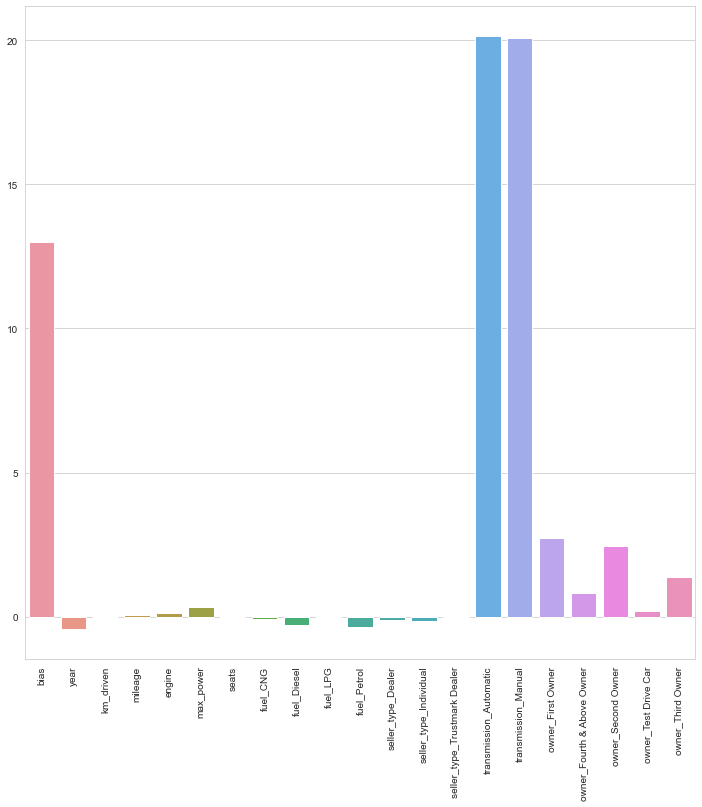

In [53]:
plt.rcParams["figure.figsize"] = (12,12)
ax = sns.barplot(x = feature_columns, y = np.array(model_lr_mpg.w)[:, 0])
ax.tick_params(axis = 'x', rotation = 90)

Transmission (Automatic and Manual), Owner (First Owner and Second Owner) are the features (+ Bias) that are the greatest contributors to the selling price.

**Tune Regularization Parameter $\alpha$**

**Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.**

**1.13. Sweep out values for $\alpha$ using `alphas = np.logspace(-2, 1, 10)`. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.**

In [54]:
import pprint

alphas = np.logspace(-2, 1, 10)
training_MSEs = dict()
validation_MSEs = dict()
curr_min_training_mse = np.inf
best_alpha = np.inf

for alpha in alphas:
    model_lr_mpg = LinearRegression(alpha)
    model_lr_mpg.train(auto_mpg_X_train, auto_mpg_y_train)

    auto_mpg_y_train_pred = model_lr_mpg.predict(auto_mpg_X_train)
    training_mse = calc_mse(auto_mpg_y_train, auto_mpg_y_train_pred)

    auto_mpg_y_val_pred = model_lr_mpg.predict(auto_mpg_X_val)
    validation_mse = calc_mse(auto_mpg_y_val, auto_mpg_y_val_pred)
    
    training_MSEs[alpha] = training_mse
    validation_MSEs[alpha] = validation_mse
    
    if training_mse < curr_min_training_mse:
        curr_min_training_mse = training_mse
        best_alpha = alpha
        
print(f"The Best Alpha is: {best_alpha} with the optimal minimum training MSE of {curr_min_training_mse}")
print("\n")
print(f"The Training MSEs are as follows:")
pprint.pprint(training_MSEs)
print("\n")
print(f"The Validation MSEs are as follows:")
pprint.pprint(validation_MSEs)

The Best Alpha is: 0.01 with the optimal minimum training MSE of 0.08582221422530054


The Training MSEs are as follows:
{0.01: 0.08582221422530054,
 0.021544346900318832: 0.0858222169708894,
 0.046415888336127774: 0.08582222971463023,
 0.1: 0.08582228886429794,
 0.21544346900318834: 0.08582256339736195,
 0.46415888336127775: 0.08582383751325384,
 1.0: 0.08582974989863232,
 2.154434690031882: 0.08585717740219874,
 4.6415888336127775: 0.08598433120182429,
 10.0: 0.08657299697681935}


The Validation MSEs are as follows:
{0.01: 0.08947371634734722,
 0.021544346900318832: 0.08947349483682585,
 0.046415888336127774: 0.08947302441489335,
 0.1: 0.08947204252039061,
 0.21544346900318834: 0.08947007374960347,
 0.46415888336127775: 0.08946651276232442,
 1.0: 0.08946199871999667,
 2.154434690031882: 0.08946691909378986,
 4.6415888336127775: 0.08954537904686093,
 10.0: 0.09002820008473657}


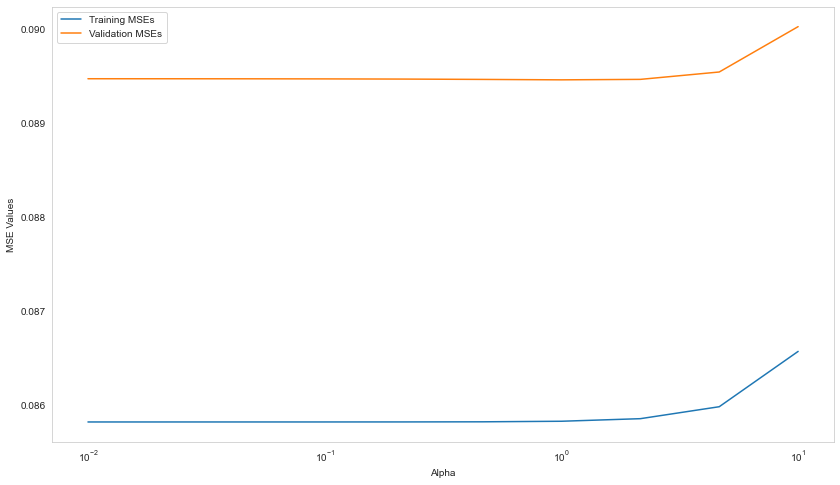

In [55]:
# Plot the training and validation MSEs for the alphas
plt.rcParams["figure.figsize"] = (14, 8)
plt.plot(training_MSEs.keys(), training_MSEs.values(), label = "Training MSEs")
plt.plot(validation_MSEs.keys(), validation_MSEs.values(), label = "Validation MSEs")
plt.xlabel("Alpha")
plt.ylabel("MSE Values")
plt.xscale('log')
plt.legend()
plt.grid(False)
plt.show()

**Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?**

As we decrease the model complexity by increasing alpha values, the (Training and Validation) MSEs slowly decrease and then increase at a growing pace when the alpha values reaches the limit of 10 in our experiment. This makes sense as we get the best model when the alpha is 0.01. As we decrease the model complexity, the model is not able to fit the data well and as efficiently as possible and thus, the errors would increase as we increase the value of alpha. (Underfitting)

**1.14. Using the $\alpha$ which gave the best validation MSE above, train a model on the training set. Report the value of $\alpha$ and its training, validation, and test MSE. This is the final tuned model which you would deploy in production.**

In [57]:
model_rr_mpg = LinearRegression(alpha = best_alpha)
model_rr_mpg.train(auto_mpg_X_train, auto_mpg_y_train)

print(f"At the Best Alpha of {best_alpha}:")

auto_mpg_y_train_pred = model_rr_mpg.predict(auto_mpg_X_train)
print(f"MSE for Training data: {calc_mse(auto_mpg_y_train, auto_mpg_y_train_pred)}")

auto_mpg_y_val_pred = model_rr_mpg.predict(auto_mpg_X_val)
print(f"MSE for Validation data: {calc_mse(auto_mpg_y_val, auto_mpg_y_val_pred)}")

auto_mpg_y_test_pred = model_rr_mpg.predict(auto_mpg_X_test)
print(f"MSE for Test data: {calc_mse(auto_mpg_y_test, auto_mpg_y_test_pred)}")

print("\n")

At the Best Alpha of 0.01:
MSE for Training data: 0.08582221422530054
MSE for Validation data: 0.08947371634734722
MSE for Test data: 0.09347429978146067




# **Part 2: Logistic Regression**

**Gender Recognition by Voice and Speech Analysis**

**This dataset is used to identify a voice as male or female, based upon acoustic properties of the voice and speech.**

In [96]:
voice_df = pd.read_csv("voice-classification.csv")
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Data - Checking Rows & Columns**

In [97]:
#Number of Rows & Columns
print(voice_df.shape) 

(3168, 21)


**2.1 What is the probability of observing different  categories in the Label feature of the dataset?**

This is mainly to check class imbalance in the dataset, and to apply different techniques to balance the dataset, which we will learn later.

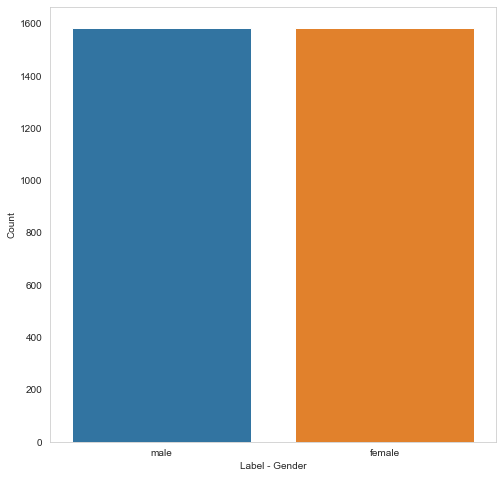

In [98]:
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (8, 8)
sns.countplot(voice_df["label"])
plt.grid(False)
plt.xlabel("Label - Gender")
plt.ylabel("Count")
plt.show()

**2.2 Plot the relationships between the label and the 20 numerical features using a small multiple of box plots. Make sure to label the axes. What useful information do this plot provide?**

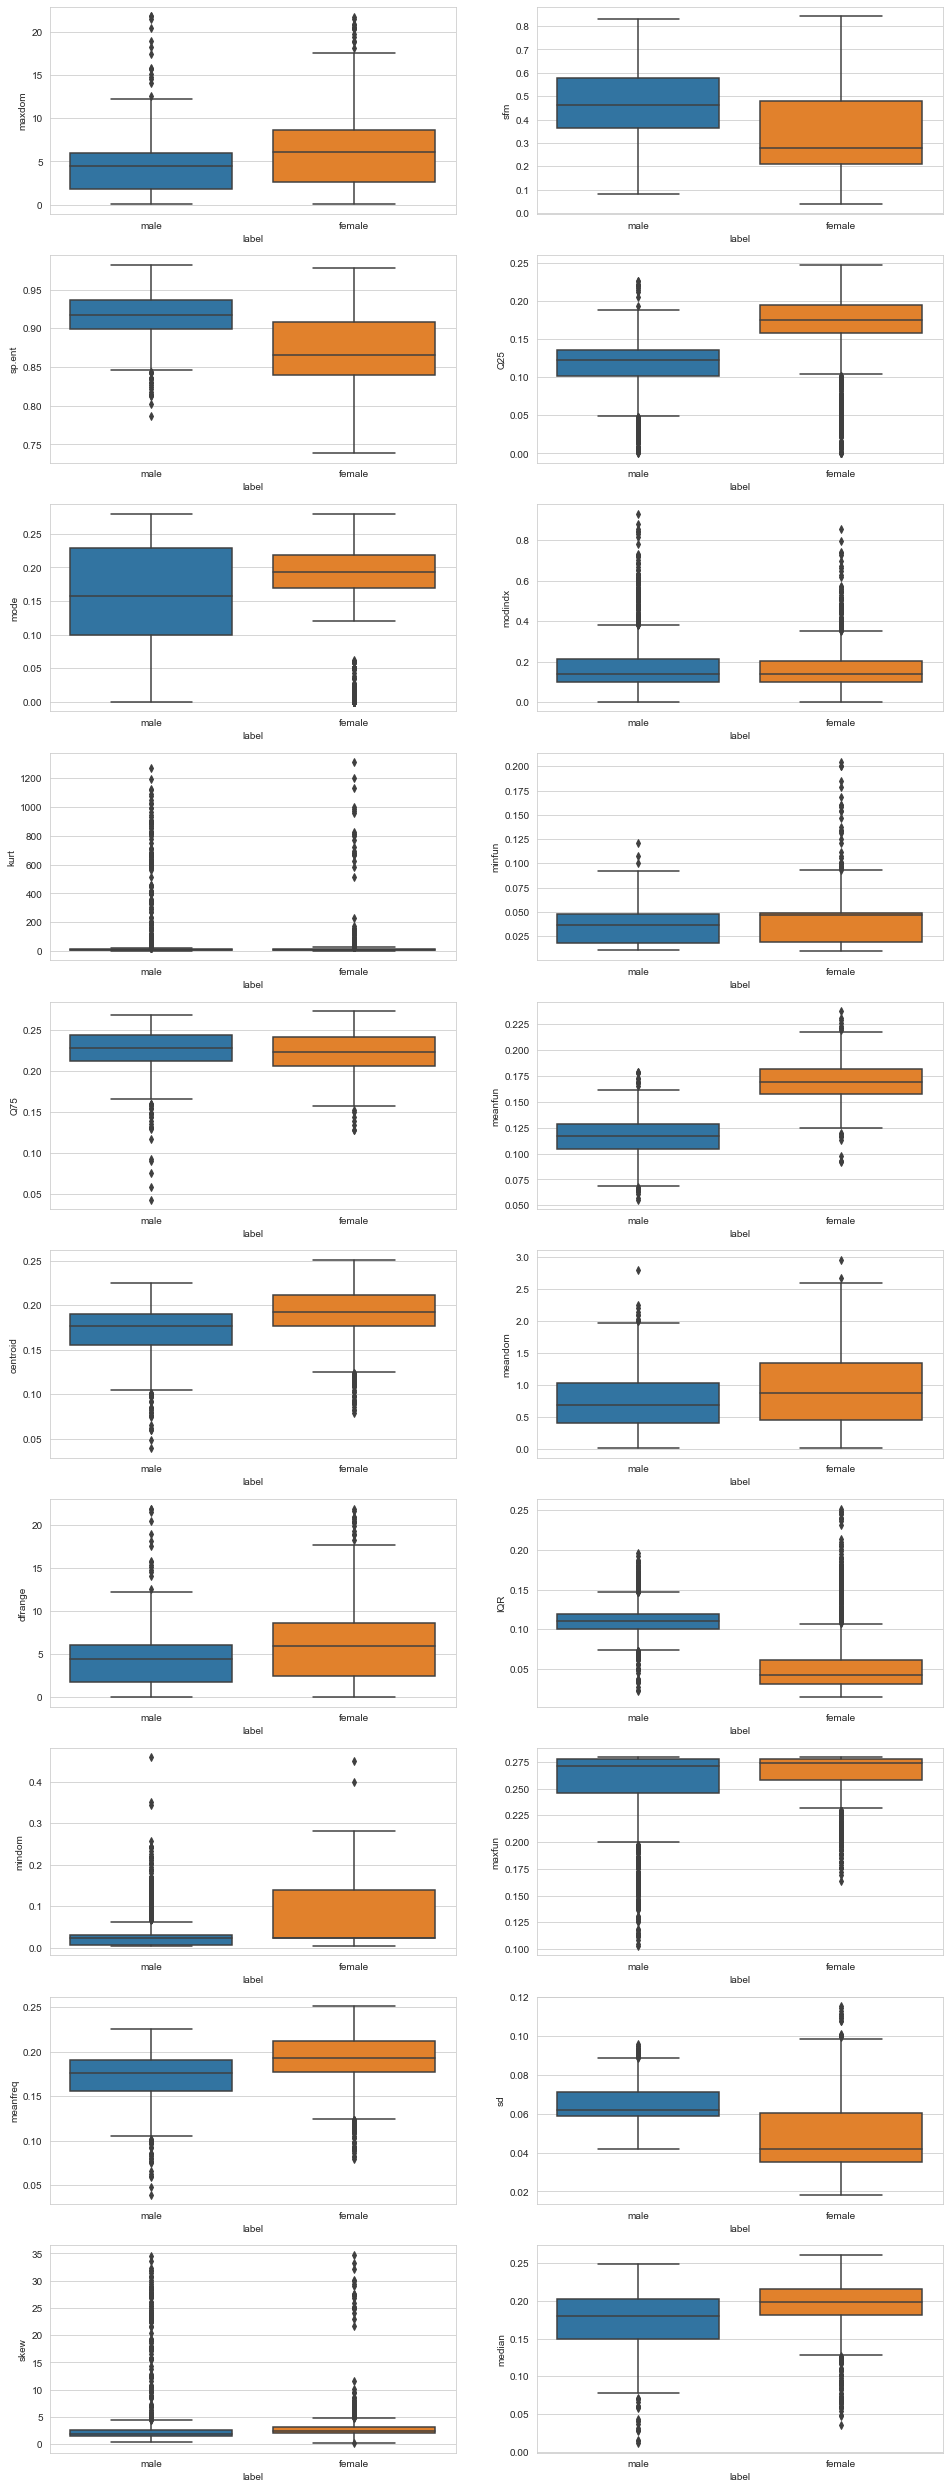

In [99]:
plt.rcParams["figure.figsize"] = (16,45)
fig, axes = plt.subplots(10, 2)
numerical_cols = set(voice_df.columns) - set(["label"])
sns.set_style("whitegrid")

for numerical_col, curr_ax in zip(numerical_cols, axes.flatten()):
    sns.boxplot(x = "label", y = numerical_col, \
                data = voice_df, \
                orient = 'v', ax = curr_ax)

The important information from the plots above can be summarized as follows:
1. Most of the features in the dataset follow a normal distribution with some skewness (positive or negative). For example, "Q25", "meanfun", "meanfreq", etc.
2. There are a lot of outliers in the dataset. For example, "kurt", "maxfun", "skew", etc.
3. One of the columns in the dataset namely "sfm" is very clean and has no outliers.
4. Some of the positively skewed distributions are "maxdom", modindx", "dfrange", "skew". Some of the negatively skewed distributions are "maxfun", "Q75", "median".
5. Some of the features follow similar distributions like "kurt and skew", "centroid and Q25".

**2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

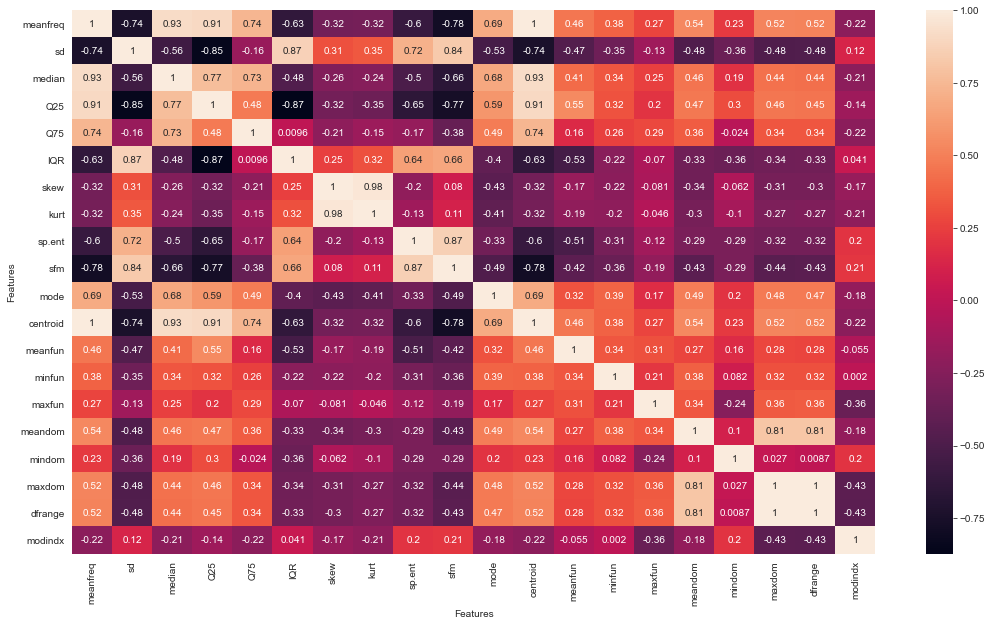

In [100]:
plt.rcParams["figure.figsize"] = (18,10)
correlation_matrix = voice_df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [101]:
# Finding highly correlated features
correlated_pairs = correlation_matrix.unstack()
sorted_correlated_pairs = correlated_pairs.sort_values(kind = "quicksort")
highly_correlated_pairs = sorted_correlated_pairs[sorted_correlated_pairs >= 0.9]
highly_correlated_features = set()

print("Highly Correlated Features with their Correlations: ")
for index, corr_val in zip(highly_correlated_pairs.index, highly_correlated_pairs.values):
    index1, index2 = index
    if index1 != index2:
        highly_correlated_features.add(index1)
        highly_correlated_features.add(index2)
        print(index1, index2, corr_val)

print("\n")        
print("Highly correlated features are: ")
highly_correlated_features = list(highly_correlated_features)
print(highly_correlated_features)

Highly Correlated Features with their Correlations: 
centroid Q25 0.9114163463244436
Q25 centroid 0.9114163463244436
Q25 meanfreq 0.9114163463244436
meanfreq Q25 0.9114163463244436
centroid median 0.9254453730463191
median centroid 0.9254453730463191
median meanfreq 0.9254453730463191
meanfreq median 0.9254453730463191
kurt skew 0.9770204562201018
skew kurt 0.9770204562201018
maxdom dfrange 0.9998384146229784
dfrange maxdom 0.9998384146229784
meanfreq centroid 1.0
centroid meanfreq 1.0


Highly correlated features are: 
['centroid', 'maxdom', 'dfrange', 'Q25', 'meanfreq', 'kurt', 'skew', 'median']


In [102]:
# Now we need to drop one of those highly correlated features (transitive relationships involved) from the data...
voice_df.drop(["Q25", "meanfreq", "skew", "median", "maxdom"], axis = 1, inplace = True)

In [103]:
voice_df

,sd,Q75,IQR,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,dfrange,modindx,label
0,0.064241,0.090193,0.075122,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.000000,0.000000,male
1,0.067310,0.092666,0.073252,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.046875,0.052632,male
2,0.083829,0.131908,0.123207,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.007812,0.046512,male
3,0.072111,0.207955,0.111374,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.554688,0.247119,male
4,0.079146,0.206045,0.127325,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.084734,0.201144,0.151859,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.203125,0.161929,female
3164,0.089221,0.204911,0.162193,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.640625,0.277897,female
3165,0.095798,0.224360,0.190936,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.929688,0.194759,female
3166,0.090628,0.219943,0.176435,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.585938,0.311002,female


The problem that arises when linear regression is applied to correlated features is the problem of "Multicollinearity". When independent variables are highly correlated, change in one variable would cause change to another and so, the model would fluctuate significantly. This would result in a highly unstable model with unstable parameters and could vary a lot for some small change in the data or the model.

**Separating Features & Y variable from the processed dataset**

**Please note to replace the dataframe below with the new dataframe created after removing highly correlated features**

In [104]:
# Split data into features and labels
voice_X = voice_df.drop(columns=['label']) #replace "voice_df1" with your dataframe from 2.3 to make sure the code runs
voice_y = voice_df['label']
print(voice_X.columns)

Index(['sd', 'Q75', 'IQR', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid',
       'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'dfrange',
       'modindx'],
      dtype='object')


In [105]:
voice_X

,sd,Q75,IQR,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,dfrange,modindx
0,0.064241,0.090193,0.075122,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.000000,0.000000
1,0.067310,0.092666,0.073252,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.046875,0.052632
2,0.083829,0.131908,0.123207,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.007812,0.046512
3,0.072111,0.207955,0.111374,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.554688,0.247119
4,0.079146,0.206045,0.127325,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.476562,0.208274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.084734,0.201144,0.151859,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.203125,0.161929
3164,0.089221,0.204911,0.162193,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.640625,0.277897
3165,0.095798,0.224360,0.190936,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.929688,0.194759
3166,0.090628,0.219943,0.176435,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.585938,0.311002


In [106]:
voice_y

0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object

**2.4 Apply the following pre-processing steps:**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [107]:
# Step - 1 & 2

label_types = list(set(voice_y))
ord_encoder = OrdinalEncoder(categories = [label_types])
enc_labels = ord_encoder.fit_transform(voice_y.to_numpy().reshape(-1, 1))
print(f"The shape of the labels data is: {enc_labels.shape}")

The shape of the labels data is: (3168, 1)


In [108]:
# Step -  3
seed = 2102

X_dev, X_test, y_dev, y_test = train_test_split(voice_X, enc_labels, test_size = 0.2, random_state = seed)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.25, random_state = seed)

print(f"Training Data Size: {X_train.shape}")
print(f"Validation Data Size: {X_val.shape}")
print(f"Test Data Size: {X_test.shape}")

Training Data Size: (1900, 15)
Validation Data Size: (634, 15)
Test Data Size: (634, 15)


In [109]:
# Step - 4

# Pre-Processing these 2 columns with the min-max scaler because the data for these is heavily skewed 
# and the distribution of the data is driven by the tail of the data and the outliers. Thus, I want to
# preserve the distribution of the data in these columns.
min_max_scale_cols = ["maxfun", "mindom", "kurt"]
std_scale_cols = list(set(X_train.columns) - set(min_max_scale_cols))

std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Train data
X_train_std_scaled = std_scaler.fit_transform(X_train[std_scale_cols])
X_train_min_max_scaled = min_max_scaler.fit_transform(X_train[min_max_scale_cols])
X_train_scaled = np.hstack([X_train_std_scaled, X_train_min_max_scaled])

# Validation Data
X_val_std_scaled = std_scaler.transform(X_val[std_scale_cols])
X_val_min_max_scaled = min_max_scaler.transform(X_val[min_max_scale_cols])
X_val_scaled = np.hstack([X_val_std_scaled, X_val_min_max_scaled])

# Test Data
X_test_std_scaled = std_scaler.transform(X_test[std_scale_cols])
X_test_min_max_scaled = min_max_scaler.transform(X_test[min_max_scale_cols])
X_test_scaled = np.hstack([X_test_std_scaled, X_test_min_max_scaled])

In [110]:
# Step - 5
voice_X_train = np.hstack([X_train_scaled, np.ones((X_train_scaled.shape[0], 1))])
voice_X_val = np.hstack([X_val_scaled, np.ones((X_val_scaled.shape[0], 1))])
voice_X_test = np.hstack([X_test_scaled, np.ones((X_test_scaled.shape[0], 1))])

In [111]:
# Convert all the dataframes to matrices and vectors
voice_X_train = np.matrix(voice_X_train)
voice_X_val = np.matrix(voice_X_val)
voice_X_test = np.matrix(voice_X_test)
voice_y_train = np.matrix(y_train)
voice_y_val = np.matrix(y_val)
voice_y_test = np.matrix(y_test)

In [112]:
print(voice_X_train, voice_X_val, voice_X_test)

[[-7.01221083e-01  1.03714277e+00  1.25212000e+00 ...  4.08602151e-02
   1.86969632e-02  1.00000000e+00]
 [-1.56337380e+00 -8.29969275e-01  1.78365483e+00 ...  4.08602151e-02
   2.84964087e-03  1.00000000e+00]
 [ 1.77085825e+00 -1.51893707e-01 -1.68421980e+00 ...  4.08602151e-02
   1.49507000e-02  1.00000000e+00]
 ...
 [ 3.43654805e-01  9.05597070e-01 -6.72949203e-02 ...  4.08602151e-02
   1.30743357e-03  1.00000000e+00]
 [ 2.13017844e-01 -1.07284537e+00 -9.43687143e-01 ...  3.33333333e-01
   6.96012430e-03  1.00000000e+00]
 [-4.23642731e-01  5.99001522e-01  1.38268616e+00 ...  4.08602151e-02
   1.50541816e-03  1.00000000e+00]] [[ 2.34993253e-01  1.91430549e+00 -5.13667566e-01 ...  4.08602151e-02
   4.72345573e-03  1.00000000e+00]
 [-2.66016510e+00 -2.10620562e-01  1.58752040e+00 ...  6.45161290e-03
   3.09194670e-03  1.00000000e+00]
 [-2.58620886e-01  1.04578596e+00  8.19882646e-01 ...  1.95698925e-01
   4.99369562e-03  1.00000000e+00]
 ...
 [ 1.15014341e-01 -7.80150727e-02 -1.3375556

In [113]:
print(voice_y_train, voice_y_val, voice_y_test)

[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]] [[0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.

**2.5 Implement Logistic Regression**

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


Implement a LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid. **You may NOT use sklearn for this implementation. It is highly recommended that you vectorize your code.**

In [114]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha, t, eta):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        curr_epoch = 0
        self.w = np.zeros((X.shape[1], 1))
        losses = list()
        
        while curr_epoch < self.t:
            losses.append(self.calculate_loss(X, y))
            self.w = self.w - self.eta * self.calculate_gradient(X, y)
            curr_epoch += 1
            
        return losses
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_preds = self.calculate_sigmoid(np.dot(X, self.w))
        threshold = 0.5
        
        for idx, y_pred in enumerate(y_preds):
            if y_pred <= threshold:
                y_preds[idx] = 0
            else:
                y_preds[idx] = 1
                
        return y_preds
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        activation_label_1 = self.calculate_sigmoid(np.dot(X, self.w))
        activation_label_2 = np.subtract(1, activation_label_1)
        loss_term_1_label_1 = np.dot(np.transpose(y), np.log(activation_label_1))
        loss_term_2_label_2 = np.dot(np.transpose(np.subtract(1, y)), np.log(activation_label_2))
        reg_term_3 = self.alpha * np.sum(np.square(self.w))
        loss = - loss_term_1_label_1 - loss_term_2_label_2 + reg_term_3
        
        return loss
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        diff_pred_actual = np.subtract(self.calculate_sigmoid(np.dot(X, self.w)), y)
        scaled_val_acc_error = np.dot(np.transpose(X), diff_pred_actual)
        regularization_term = np.dot(2 * self.alpha, self.w)
        gradient = np.add(scaled_val_acc_error, regularization_term)
        
        return gradient
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        sigmoid_x = 1 / (1 + np.exp(- x.reshape(-1, 1)))
        
        return sigmoid_x

**2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

In [115]:
# For A part when alpha is 0

In [116]:
# Training a logistic regression model using the parameters specified
model_log_reg_alpha_0 = LogisticRegression(0, 100, 1e-3)
log_reg_alpha_0_losses = model_log_reg_alpha_0.train(voice_X_train, voice_y_train)
validation_loss_alpha_0 = model_log_reg_alpha_0.calculate_loss(voice_X_val, voice_y_val)
test_loss_alpha_0 = model_log_reg_alpha_0.calculate_loss(voice_X_test, voice_y_test)

print(f"Validation Loss: {validation_loss_alpha_0}")
print(f"Test Loss: {test_loss_alpha_0}")

Validation Loss: [[72.68464679]]
Test Loss: [[60.48815139]]


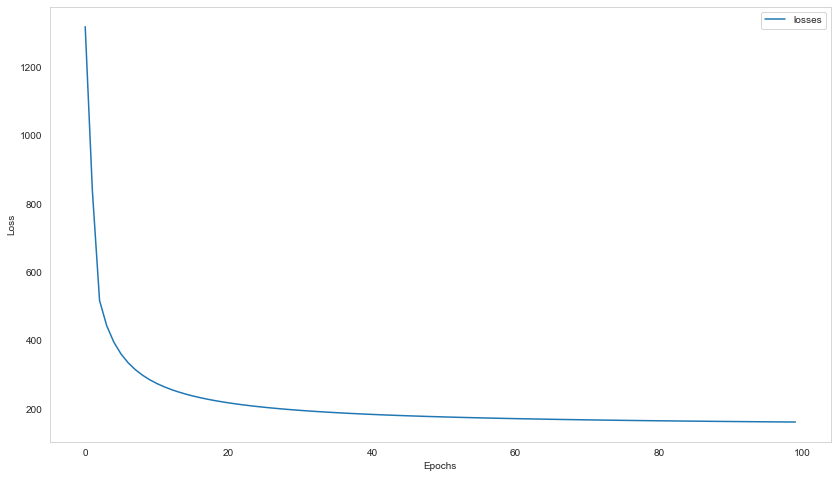

In [117]:
# Training Loss over epochs plot - PART A
log_reg_alpha_0_losses_arr = [loss[0, 0] for loss in log_reg_alpha_0_losses]
plt.rcParams["figure.figsize"] = (14, 8)
plt.plot(list(range(100)), log_reg_alpha_0_losses_arr, label = "losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(False)
plt.show()

In [118]:
# For B part with some non zero alphas

In [119]:
# Finding best hyperparameters
import random
random.seed(21)

counter = 1
random_search_count = 200
min_loss = np.inf
optimal_alpha = np.inf
optimal_eta = np.inf
optimal_t = np.inf

while counter <= random_search_count:
    curr_alpha = float(random.randrange(0, 100) / 100.0)
    curr_eta = float(random.randrange(0, 1000) / 1000000.0)
    curr_t = random.randint(1, 101)
    
    print(f"At current experiment {counter} with hyperparameter values as:")
    print(f"alpha = {curr_alpha}, eta = {curr_eta}, t = {curr_t}")
    
    model_log_reg = LogisticRegression(curr_alpha, curr_t, curr_eta)
    losses = model_log_reg.train(voice_X_train, voice_y_train)
    curr_val_loss = model_log_reg.calculate_loss(voice_X_val, voice_y_val)[0, 0]
    
    print(f"Validation Loss is: {curr_val_loss}")
    
    if curr_val_loss < min_loss:
        min_loss = curr_val_loss
        optimal_alpha = curr_alpha
        optimal_eta = curr_eta
        optimal_t = curr_t
        
    counter += 1
    
print(f"The best hyperparameter values are: alpha = {optimal_alpha}, eta = {optimal_eta}, t = {optimal_t}")
print(f"Validation Loss at this was: {min_loss}")

At current experiment 1 with hyperparameter values as:
alpha = 0.21, eta = 0.000428, t = 89
Validation Loss is: 78.11775376478961
At current experiment 2 with hyperparameter values as:
alpha = 0.53, eta = 0.00065, t = 37
Validation Loss is: 85.37733392545037
At current experiment 3 with hyperparameter values as:
alpha = 0.61, eta = 0.000863, t = 28
Validation Loss is: 86.2304794349043
At current experiment 4 with hyperparameter values as:
alpha = 0.6, eta = 0.000827, t = 66
Validation Loss is: 84.78495956894729
At current experiment 5 with hyperparameter values as:
alpha = 0.23, eta = 0.000517, t = 68
Validation Loss is: 78.78996216465812
At current experiment 6 with hyperparameter values as:
alpha = 0.3, eta = 0.000807, t = 1
Validation Loss is: 254.92720294463797
At current experiment 7 with hyperparameter values as:
alpha = 0.01, eta = 0.000379, t = 75
Validation Loss is: 77.0461192065779
At current experiment 8 with hyperparameter values as:
alpha = 0.54, eta = 7e-05, t = 19
Valida

Validation Loss is: 88.74829694920344
At current experiment 78 with hyperparameter values as:
alpha = 0.17, eta = 0.000136, t = 19
Validation Loss is: 168.7903030378317
At current experiment 79 with hyperparameter values as:
alpha = 0.12, eta = 0.000406, t = 13
Validation Loss is: 122.97137812388547
At current experiment 80 with hyperparameter values as:
alpha = 0.23, eta = 2.5e-05, t = 83
Validation Loss is: 186.41932395774182
At current experiment 81 with hyperparameter values as:
alpha = 0.57, eta = 0.000805, t = 19
Validation Loss is: 90.91312678752814
At current experiment 82 with hyperparameter values as:
alpha = 0.09, eta = 0.000888, t = 16
Validation Loss is: 87.46474141685087
At current experiment 83 with hyperparameter values as:
alpha = 0.83, eta = 0.000288, t = 17
Validation Loss is: 130.29625411924357
At current experiment 84 with hyperparameter values as:
alpha = 0.38, eta = 0.000551, t = 42
Validation Loss is: 83.8942975215863
At current experiment 85 with hyperparameter

Validation Loss is: 79.04581805888293
At current experiment 151 with hyperparameter values as:
alpha = 0.35, eta = 0.000733, t = 49
Validation Loss is: 80.56824707237482
At current experiment 152 with hyperparameter values as:
alpha = 0.2, eta = 0.000963, t = 51
Validation Loss is: 77.16628178848529
At current experiment 153 with hyperparameter values as:
alpha = 0.59, eta = 0.000411, t = 56
Validation Loss is: 86.61447018018053
At current experiment 154 with hyperparameter values as:
alpha = 0.58, eta = 0.000631, t = 86
Validation Loss is: 84.38139018497354
At current experiment 155 with hyperparameter values as:
alpha = 0.35, eta = 0.000685, t = 23
Validation Loss is: 88.49615772378246
At current experiment 156 with hyperparameter values as:
alpha = 0.85, eta = 0.000393, t = 80
Validation Loss is: 88.46602042191229
At current experiment 157 with hyperparameter values as:
alpha = 0.34, eta = 0.000101, t = 25
Validation Loss is: 171.20789386382282
At current experiment 158 with hyperpa

In [120]:
# Train the model using the best found hyperparameters
model_log_reg = LogisticRegression(optimal_alpha, optimal_t, optimal_eta)
log_reg_train_losses = model_log_reg.train(voice_X_train, voice_y_train)

In [121]:
# Accuracy Comparisons for PART A and PART B
y_test_preds_alpha_0 = model_log_reg_alpha_0.predict(voice_X_test)
y_test_preds_optimal_alpha = model_log_reg.predict(voice_X_test)

print(f"Accuracy Score of Logistic Regression at Alpha 0 is: {accuracy_score(y_test_preds_alpha_0, voice_y_test)}")
print(f"Accuracy Score of Logistic Regression at Alpha {optimal_alpha} is: \
    {accuracy_score(y_test_preds_optimal_alpha, voice_y_test)}")


Accuracy Score of Logistic Regression at Alpha 0 is: 0.9747634069400631
Accuracy Score of Logistic Regression at Alpha 0.0 is:     0.973186119873817


After hyperparameter tuning, there is no improvement. Even so, it becomes a little less than before.

**2.7 Feature Importance**

Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! 

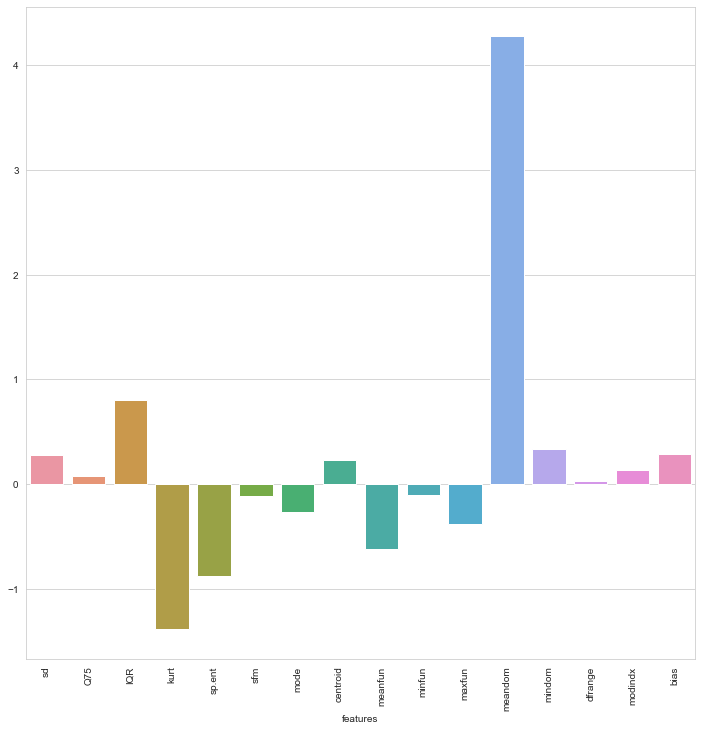

In [122]:
feature_columns = list(voice_X.columns)
feature_columns.append("bias")
plt.rcParams["figure.figsize"] = (12,12)
plt.xlabel("features")
ax = sns.barplot(x = feature_columns, y = np.array(model_log_reg.w)[:, 0])
ax.tick_params(axis = 'x', rotation = 90)

The most important features as we can see above are:
1. meandom
2. kurt
3. sp.ent
4. IQR
5. meanfun


# **Part 3: Support Vector Machines - with the same Dataset**

**3.1 Dual SVM**

A) Train a dual SVM (with default parameters) for both kernel=“linear” and kernel=“rbf”) on the Voice Recognition training data.

B) Make predictions and report the accuracy on the training, validation, and test sets. Which kernel gave better accuracy on test dataset and why do you think that was better?

C) Please report the support vectors in both the cases and what do you observe? Explain


In [123]:
# PART A - Linear SVM
model_dual_lin_svm = SVC(kernel = "linear")
model_dual_lin_svm.fit(voice_X_train, voice_y_train)

SVC(kernel='linear')

In [124]:
# PART A - RBF SVM
model_dual_rbf_svm = SVC(kernel = "rbf")
model_dual_rbf_svm.fit(voice_X_train, voice_y_train)

SVC()

In [125]:
# PART B - Linear SVM
print("For Linear SVM:")

lin_svm_y_train_preds = model_dual_lin_svm.predict(voice_X_train)
print(f"Accuacy Score for Training Data: {accuracy_score(lin_svm_y_train_preds, voice_y_train)}")

lin_svm_y_val_preds = model_dual_lin_svm.predict(voice_X_val)
print(f"Accuacy Score for Validation Data: {accuracy_score(lin_svm_y_val_preds, voice_y_val)}")

lin_svm_y_test_preds = model_dual_lin_svm.predict(voice_X_test)
print(f"Accuacy Score for Testing Data: {accuracy_score(lin_svm_y_test_preds, voice_y_test)}")

For Linear SVM:
Accuacy Score for Training Data: 0.9763157894736842
Accuacy Score for Validation Data: 0.9716088328075709
Accuacy Score for Testing Data: 0.9794952681388013


In [126]:
# PART B - RBF SVM
print("For RBF SVM:")

rbf_svm_y_train_preds = model_dual_rbf_svm.predict(voice_X_train)
print(f"Accuacy Score for Training Data: {accuracy_score(rbf_svm_y_train_preds, voice_y_train)}")

rbf_svm_y_val_preds = model_dual_rbf_svm.predict(voice_X_val)
print(f"Accuacy Score for Validation Data: {accuracy_score(rbf_svm_y_val_preds, voice_y_val)}")

rbf_svm_y_test_preds = model_dual_rbf_svm.predict(voice_X_test)
print(f"Accuacy Score for Testing Data: {accuracy_score(rbf_svm_y_test_preds, voice_y_test)}")

For RBF SVM:
Accuacy Score for Training Data: 0.9842105263157894
Accuacy Score for Validation Data: 0.9794952681388013
Accuacy Score for Testing Data: 0.9810725552050473


RBF Kernel has better accuracy on the test data than the linear kernel because RBF Kernel converts the data into higher dimensional plane and creates more hyperplanes to separate the data points. Due to this increase in complexity of the hyperplanes and the increase in dimensions and support vectors, more complex data can be fit well using the RBF Kernel. 

In [129]:
# PART C - Linear SVM
decision_function = model_dual_lin_svm.decision_function(voice_X_train)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = voice_X_train[support_vector_indices]
print(f"Number of support vectors with Linear SVM are: {support_vectors.shape[0]}")
support_vectors

Number of support vectors with Linear SVM are: 127


matrix([[ 6.79382435e-01, -1.58515171e-03,  4.55344662e-01, ...,
          6.45161290e-03,  1.86814345e-03,  1.00000000e+00],
        [-1.45019774e+00, -2.20057687e-01,  1.16040261e+00, ...,
          6.45161290e-03,  4.99181215e-03,  1.00000000e+00],
        [-1.65538809e+00, -8.37171666e-01,  1.29881208e+00, ...,
          6.45161290e-03,  5.37501450e-02,  1.00000000e+00],
        ...,
        [-1.74423088e+00, -8.13622029e-01,  1.89871824e+00, ...,
          6.45161290e-03,  2.79160532e-02,  1.00000000e+00],
        [ 9.81778061e-01,  2.22384135e+00, -5.30444804e-01, ...,
          4.53763441e-01,  3.15787672e-03,  1.00000000e+00],
        [ 4.44892847e-01,  8.86167694e-01, -4.44589313e-02, ...,
          4.08602151e-02,  2.02538800e-03,  1.00000000e+00]])

In [130]:
# PART C - RBF SVM
print(f"Number of support vectors with RBF SVM are: {model_dual_rbf_svm.support_vectors_.shape[0]}")
model_dual_rbf_svm.support_vectors_

Number of support vectors with RBF SVM are: 243


array([[ 1.46044014,  0.12571299, -1.55823414, ...,  0.00645161,
         0.01154799,  1.        ],
       [-0.14291593, -0.24794541,  0.25367505, ...,  0.04086022,
         0.00426603,  1.        ],
       [ 0.93152034, -0.5262627 , -1.83598916, ...,  0.47096774,
         0.0051018 ,  1.        ],
       ...,
       [ 0.98177806,  2.22384135, -0.5304448 , ...,  0.45376344,
         0.00315788,  1.        ],
       [-0.22937925, -0.07754958,  1.05141168, ...,  0.34408602,
         0.00587675,  1.        ],
       [-0.51958109, -1.2512546 ,  1.60053777, ...,  0.10967742,
         0.20100826,  1.        ]])

Observation: The number of support vectors increases for the RBF kernel and is approximately doubled and thus, would be suited well for data with higher complexity. As the RBF kernel increases the dimensionality of the data and produces non-linear hyperplanes and support vectors, potentially it can do so in more ways when compared to the Linear SVM. Due to this increase in complexity, it tries to fit the data in a better manner which in turn means having more support vectors to do the same. 

**3.2 Using Kernel “rbf”, tune the hyperparameter “C” using the Grid Search & k-fold cross validation. You may take k=5 and assume values in grid between 1 to 100 with interval range of your choice.**

In [131]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline

In [132]:
# Using Grid Search and K-fold Cross Validation
voice_X_dev = np.vstack((voice_X_train, voice_X_val))
voice_y_dev = np.vstack((voice_y_train, voice_y_val))

pipe = make_pipeline(GridSearchCV(SVC(kernel = "rbf"), \
                                  param_grid = {"C": list(range(1, 101))}, \
                                  cv=5,
                                  return_train_score = True))
pipe.fit(voice_X_dev, voice_y_dev)

grid_search_results = pipe.named_steps["gridsearchcv"]
grid_search_result_C = grid_search_results.best_params_['C']
print(f"Best value of hyperparameter C is: {grid_search_result_C}")
print(f"Best Accuracy Score: {grid_search_results.best_score_}")
print(f"Accuracy Score for Testing Data: {pipe.score(voice_X_test, voice_y_test)}")

Best value of hyperparameter C is: 10
Best Accuracy Score: 0.9857933593719548
Accuracy Score for Testing Data: 0.9810725552050473
